### 딥러닝을 이용한 회귀분석

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 공부시간과 성적에 대한 상관/회귀 분석
x = [2,4,6,8]
y = [81,93,91,97]

(1.0, 9.0, 75.0, 100.0)

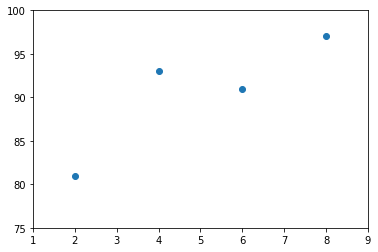

In [5]:
plt.scatter(x, y)
plt.axis([1,9,75,100])

In [6]:
# 텐서플로와 경사하강법을 이용한 선형회귀 예제

In [7]:
# x, y 데이터 설정
data = [[2,81],[4,93],[6,91],[8,97]]    # 2차원 텐서 정의
x_data = [x[0] for x in data]
y_data = [x[1] for x in data]

In [8]:
# x, y 데이터 설정
data = [[2,81],[4,93],[6,91],[8,97]]    # 2차원 텐서 정의
x_data = [x[0] for x in data]
y_data = [x[1] for x in data]

In [9]:
# 기울기 a와 절편 b는 임의의 범위로 설정
# 기울기는 0~10, 절편은 0~100으로 설정
import tensorflow as tf
a = tf.Variable(tf.random_uniform([1], 0, 10,
                dtype=tf.float64, seed=1))
b = tf.Variable(tf.random_uniform([1], 0, 100,
                dtype=tf.float64, seed=1))

In [10]:
# 선형회귀식 정의
y = a * x_data + b

In [11]:
# 텐서플로에서 제공하는 평균제곱근 함수 사용
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

In [12]:
# 학습률 정의
learn_rate = 0.1

In [13]:
# RMSE를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer\
              (learn_rate).minimize(rmse)

In [26]:
# 텐서플로로 학습 시도
with tf.Session() as sess:
    # 텐서플로 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 학습횟수만큼 훈련 - 적절한 기울기 찾음
    # 총 학습횟수는 2000, 10회때마다 진행상황 출력
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 10 == 0:
            print('훈련횟수 epoch %.f, RMSE %.3f,'\
            '기울기 %.3f, 절편 %.3f' %
                  ( step, sess.run(rmse),
                    sess.run(a), sess.run(b)))

훈련횟수 epoch 0, RMSE 45.830,기울기 8.579, 절편 91.135
훈련횟수 epoch 10, RMSE 16.089,기울기 3.205, 절편 90.175
훈련횟수 epoch 20, RMSE 5.157,기울기 0.550, 절편 89.476
훈련횟수 epoch 30, RMSE 5.046,기울기 0.600, 절편 89.147
훈련횟수 epoch 40, RMSE 4.938,기울기 0.654, 절편 88.822
훈련횟수 epoch 50, RMSE 4.832,기울기 0.708, 절편 88.502
훈련횟수 epoch 60, RMSE 4.729,기울기 0.761, 절편 88.185
훈련횟수 epoch 70, RMSE 4.628,기울기 0.813, 절편 87.871
훈련횟수 epoch 80, RMSE 4.530,기울기 0.865, 절편 87.563
훈련횟수 epoch 90, RMSE 4.435,기울기 0.916, 절편 87.258
훈련횟수 epoch 100, RMSE 4.343,기울기 0.966, 절편 86.958
훈련횟수 epoch 110, RMSE 4.253,기울기 1.016, 절편 86.663
훈련횟수 epoch 120, RMSE 4.167,기울기 1.064, 절편 86.374
훈련횟수 epoch 130, RMSE 4.084,기울기 1.112, 절편 86.089
훈련횟수 epoch 140, RMSE 4.004,기울기 1.159, 절편 85.810
훈련횟수 epoch 150, RMSE 3.927,기울기 1.205, 절편 85.537
훈련횟수 epoch 160, RMSE 3.854,기울기 1.249, 절편 85.270
훈련횟수 epoch 170, RMSE 3.784,기울기 1.293, 절편 85.009
훈련횟수 epoch 180, RMSE 3.717,기울기 1.336, 절편 84.754
훈련횟수 epoch 190, RMSE 3.654,기울기 1.377, 절편 84.506
훈련횟수 epoch 200, RMSE 3.595,기울기 1.418, 절편 84.265
훈

### 경사하강법 적용시 고려사항
* 학습률 : 기울기의 부호를 바뀌 이동시킬때 적절한 거리를 찾지 못해 너무 멀리 이동시키면 중심점을 지나칠수도 있음
* 따라서, 어느 만큼 이동시킬지 신중히 결정해야 함
* 케라스는 자동으로 이동거리를 조절해 줌

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
xtrain = [2,4,6,8]
ytrain = [81,93,91,97]

In [17]:
model = Sequential()
model.add(Dense(1, input_dim=1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
# 비용계산 함수 : rmse
model.compile(loss='mse', optimizer='sgd',
              metrics=['accuracy'])

In [21]:
# 2500회의 학습 시행, 진행상황 표시 - 1 출력 0 미출력
model.fit(xtrain, ytrain, epochs=2500, verbose=0)

In [22]:
# 결과 출력
print('기울기 %.3f' % model.get_weights()[0])
print('절편 %.3f' % model.get_weights()[1])

기울기 2.300
절편 78.999


In [23]:
# 예측하기
ypredict = model.predict(np.array([55]))
print('55시간 공부하면 성적은', ypredict)

ypredict = model.predict(np.array([10]))
print('10시간 공부하면 성적은', ypredict)

55시간 공부하면 성적은 [[205.50935]]
10시간 공부하면 성적은 [[102.00076]]


* 손실함수loss function
     + 비용cost함수라고도 함
     + 신경망이 잘 학습하고 있는지를 나타내주는 지표
    + 손실loss,비용cost은 출력값과 실제값 사이의 오차를 의미
     + 신경망에서는 이것들이 최소화되도록 하는 과정이 학습임
     + 따라서, 손실이 최소화된다는 것은 학습이 잘되고 있음을 의미<br><br>

* 딥러닝에서 손실함수는 평균제곱오차MSE(회귀)와 교차엔트로피오차CEE(분류)를 사용함

* 학습 최적화 방법
* 텐서플로에서는 optimizer로 설정

* 경사하강법SGD - 확률적 경사하강법 : 무작위 값을 대입

* 모멘텀        - SGD + 무작위값에 탄성을 부여 (정확도 개선)

* 아다그라드adagrad - 학습률에 탄성을 부여 (보폭크기 개선)
*                     무작위값 대입 횟수를 조절

* RMSprop - adagrad의 보폭 민감도를 개선 (보폭크기 개선)

* Adam - 무작위값에 탄성부여, 학습률에도 탄성 부여
    + 즉, 정확도 개선 + 보폭크기 개선
    + keras.optimizer.Adam(lr=0.0001,
    + beta_1=0.9, beta_2=0.9999,
    + elpsilon=1e-08, decay=0.0)